In [5]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [6]:
df = pd.read_csv('database.csv')

In [7]:
df.head()

,Unnamed: 0,0,1,2,3,4,5,6
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,"May 27, 2019",8674.07,8907.17,8668.70,8805.78,"27,949,839,564","156,093,754,762"
2,2,"May 26, 2019",8055.21,8687.52,7924.67,8673.22,"26,677,970,091","153,725,486,067"
3,3,"May 25, 2019",7991.89,8117.93,7965.98,8052.54,"22,256,813,107","142,708,188,838"
4,4,"May 24, 2019",7881.70,8140.72,7824.45,7987.37,"25,919,126,991","141,539,115,575"


In [8]:
df.drop(df.index[0], inplace = True)

In [9]:
df.head()

,Unnamed: 0,0,1,2,3,4,5,6
1,1,"May 27, 2019",8674.07,8907.17,8668.70,8805.78,"27,949,839,564","156,093,754,762"
2,2,"May 26, 2019",8055.21,8687.52,7924.67,8673.22,"26,677,970,091","153,725,486,067"
3,3,"May 25, 2019",7991.89,8117.93,7965.98,8052.54,"22,256,813,107","142,708,188,838"
4,4,"May 24, 2019",7881.70,8140.72,7824.45,7987.37,"25,919,126,991","141,539,115,575"
5,5,"May 23, 2019",7677.27,7943.79,7533.20,7881.85,"24,457,107,820","139,654,107,035"


In [10]:
df.drop(columns = ['Unnamed: 0'], inplace = True)

In [11]:
df.columns = ['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Market_cap']

In [12]:
df.Date = pd.to_datetime(df.Date)
df.set_index("Date", inplace = True)

In [13]:
df.sort_index(inplace = True)

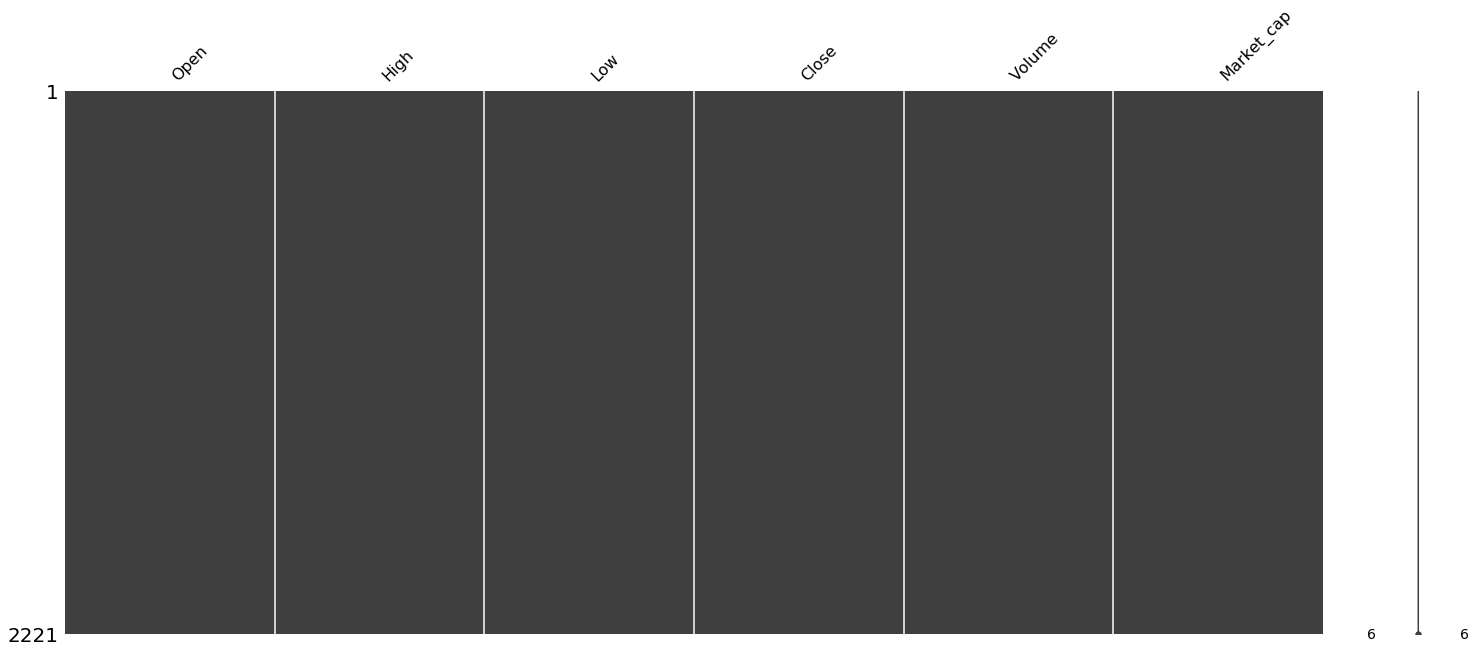

In [14]:
import missingno as msno
msno.matrix(df);

In [15]:
df.head()

,Open,High,Low,Close,Volume,Market_cap
Date,,,,,,
2013-04-28,135.30,135.98,132.10,134.21,-,"1,488,566,728"
2013-04-29,134.44,147.49,134.00,144.54,-,"1,603,768,865"
2013-04-30,144.00,146.93,134.05,139.00,-,"1,542,813,125"
2013-05-01,139.00,139.89,107.72,116.99,-,"1,298,954,594"
2013-05-02,116.38,125.60,92.28,105.21,-,"1,168,517,495"


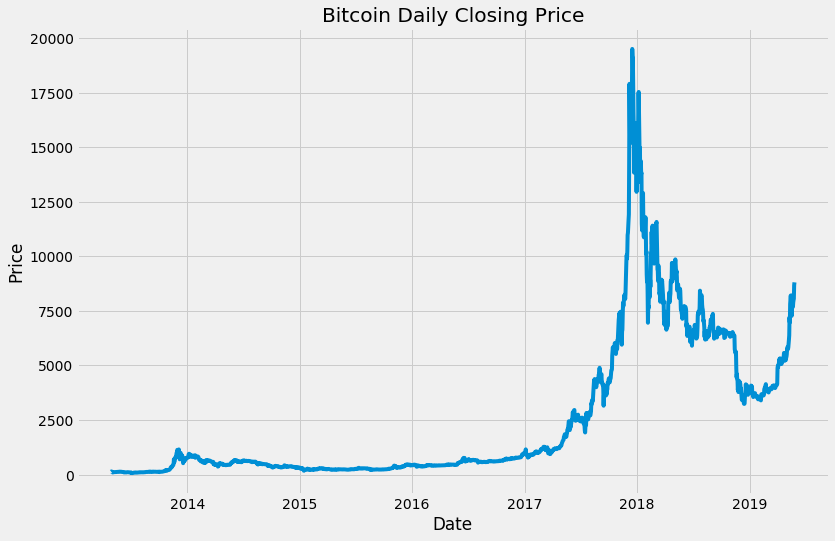

In [16]:
plt.style.use('fivethirtyeight')
ax = df['Close'].plot(figsize = [12,8], title = 'Bitcoin Daily Closing Price', fontsize = 14)
ax.set_ylabel('Price')
plt.show()

In [32]:
data = df.Close

In [33]:
# train-test split
split_date = '2018-09-01'
data_train = data.loc[data.index <= split_date].copy()
data_test = data.loc[data.index > split_date].copy()

In [35]:
#Data preprocessing
training_set = data_train.values
training_set = np.reshape(training_set, (len(training_set), 1)  )
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
training_set = sc.fit_transform(training_set)
X_train = training_set[0: len(training_set)-1]
y_train = training_set[1:len(training_set)]
X_train = np.reshape(X_train, (len(X_train),1 , 1))

In [36]:
# reshaping and scaling the data
testing_set = data_test.values
testing_set = np.reshape(testing_set, (len(testing_set), 1)  )
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
testing_set = sc.fit_transform(testing_set)


# X_train = training_set[0: len(training_set)-1]
# y_train = training_set[1:len(training_set)]
# X_train = np.reshape(X_train, (len(X_train),1 , 1))

In [37]:
# reshaping scaled data
X_test = testing_set[0: len(testing_set) -1]
y_test = testing_set[1: len(testing_set)]
X_test = np.reshape(X_test, (len(X_test), 1, 1))

In [50]:
# importing dependencies
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Activation 
# initiating the model
model = Sequential()
model.add(LSTM(128, activation = "sigmoid", input_shape = (1,1)))
model.add(Dropout(0.4))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')
model.fit(X_train, y_train, epochs = 100, batch_size = 50, verbose =2)

Epoch 1/100
 - 1s - loss: 0.1383
Epoch 2/100
 - 0s - loss: 0.1159
Epoch 3/100
 - 0s - loss: 0.1033
Epoch 4/100
 - 0s - loss: 0.0881
Epoch 5/100
 - 0s - loss: 0.0794
Epoch 6/100
 - 0s - loss: 0.0720
Epoch 7/100
 - 0s - loss: 0.0657
Epoch 8/100
 - 0s - loss: 0.0568
Epoch 9/100
 - 0s - loss: 0.0494
Epoch 10/100
 - 0s - loss: 0.0445
Epoch 11/100
 - 0s - loss: 0.0382
Epoch 12/100
 - 0s - loss: 0.0376
Epoch 13/100
 - 0s - loss: 0.0358
Epoch 14/100
 - 0s - loss: 0.0350
Epoch 15/100
 - 0s - loss: 0.0321
Epoch 16/100
 - 0s - loss: 0.0298
Epoch 17/100
 - 0s - loss: 0.0297
Epoch 18/100
 - 0s - loss: 0.0272
Epoch 19/100
 - 0s - loss: 0.0275
Epoch 20/100
 - 0s - loss: 0.0261
Epoch 21/100
 - 0s - loss: 0.0254
Epoch 22/100
 - 0s - loss: 0.0251
Epoch 23/100
 - 0s - loss: 0.0239
Epoch 24/100
 - 0s - loss: 0.0253
Epoch 25/100
 - 0s - loss: 0.0229
Epoch 26/100
 - 0s - loss: 0.0225
Epoch 27/100
 - 0s - loss: 0.0210
Epoch 28/100
 - 0s - loss: 0.0221
Epoch 29/100
 - 0s - loss: 0.0195
Epoch 30/100
 - 0s - lo

In [51]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 128)               66560     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 129       
Total params: 66,689
Trainable params: 66,689
Non-trainable params: 0
_________________________________________________________________


In [52]:
# prediction
predicted_BTC_price = model.predict(X_test)

In [53]:
predicted_BTC_price.shape

(267, 1)

In [54]:
data_test['Price_Prediction'] = predicted_BTC_price

In [55]:
data_all = pd.concat([data_test, data_train], sort = False)

In [56]:
data_all[['','Price_Prediction']]

/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:851: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]


Date
                                                                  NaN
Price_Prediction    [[0.6291807], [0.62750363], [0.6408497], [0.56...
Name: Close, dtype: object

In [57]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Market_cap'], dtype='object')

In [58]:
data_all.shape

(2222,)

In [59]:
data_test.shape

(269,)

In [60]:
#predicted_BTC_price

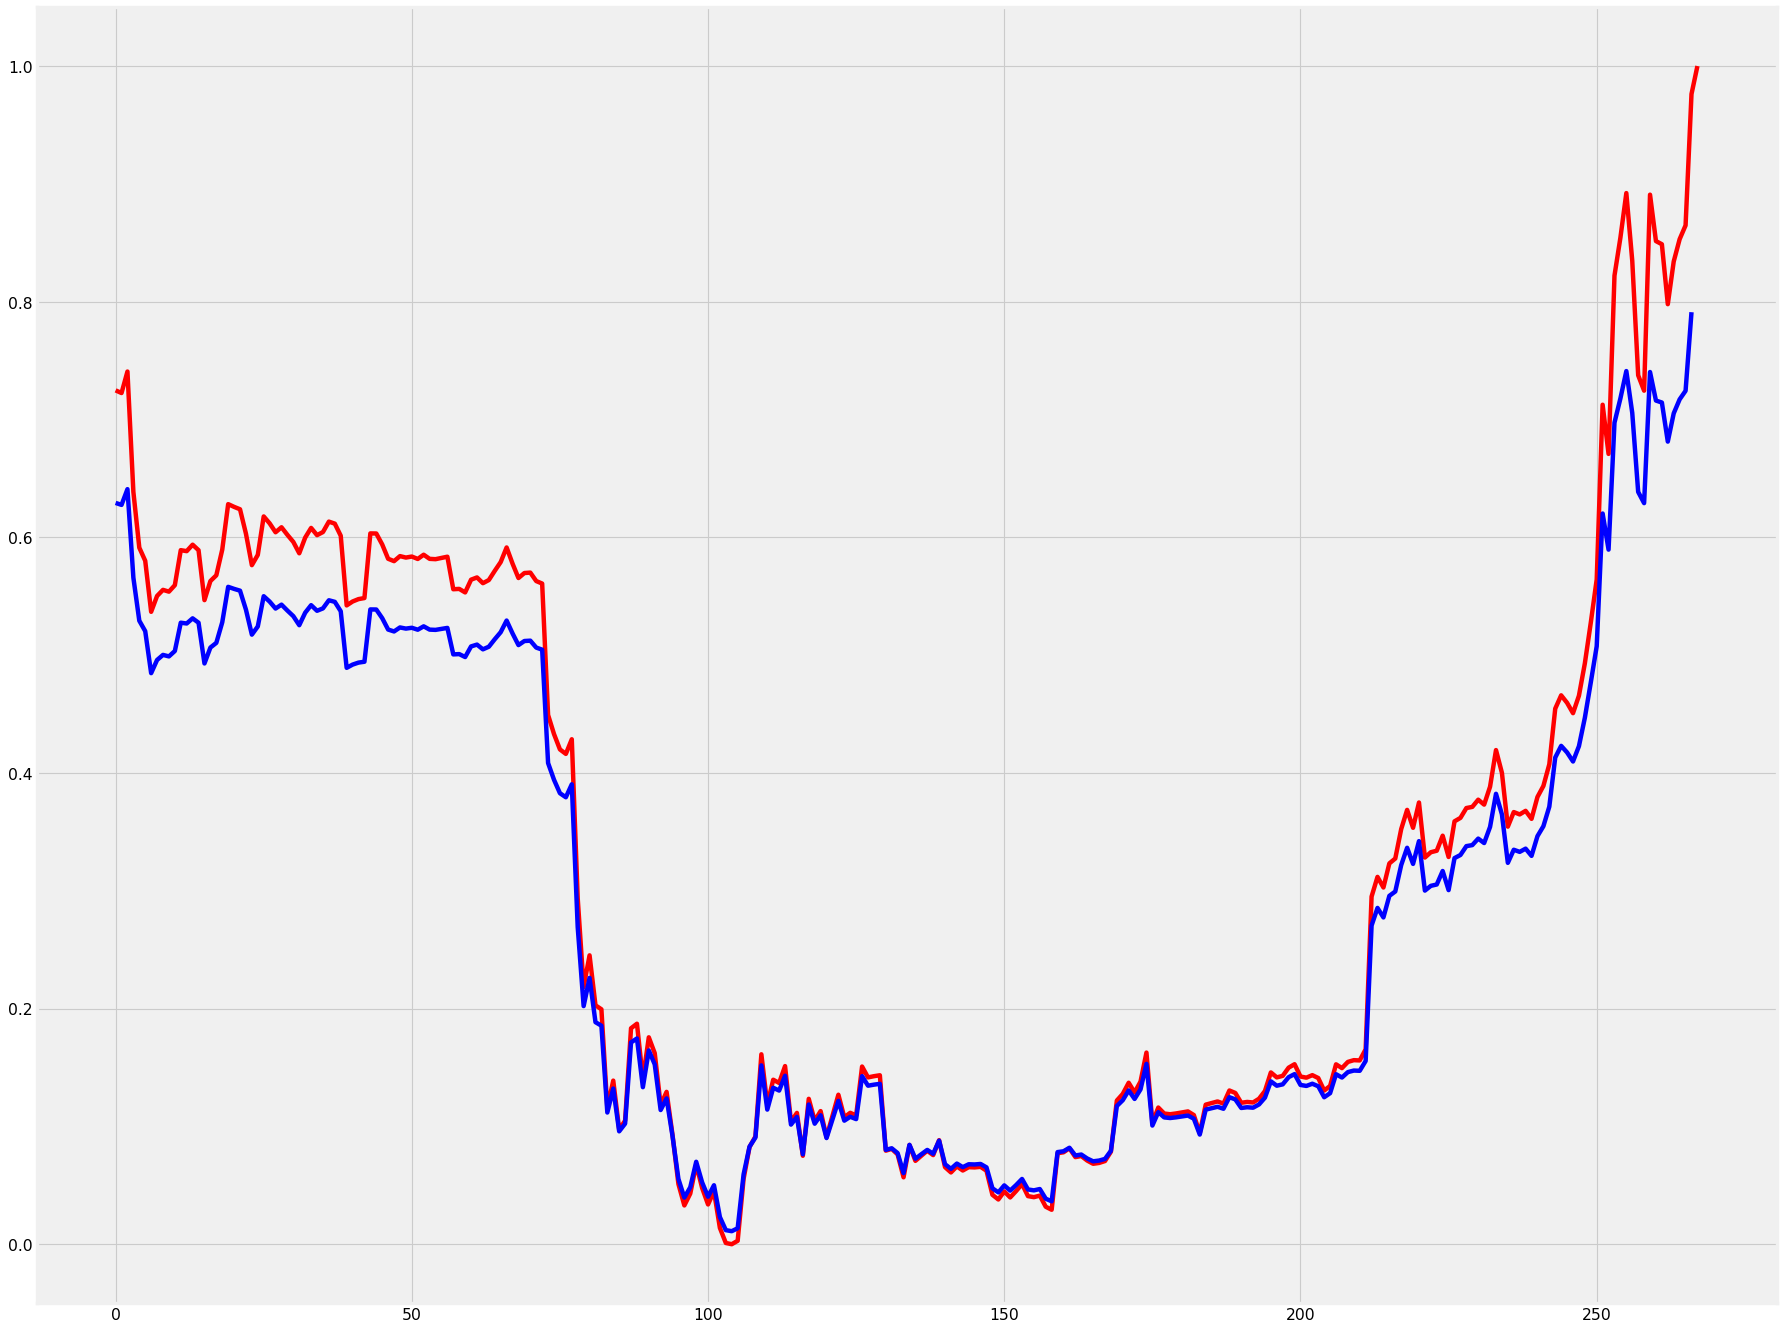

In [61]:
plt.figure(figsize = (25,20), dpi = 80, facecolor = 'w', edgecolor = 'k')
plt.plot(testing_set[:, 0], color = 'red', label = 'Real BTC Price')
plt.plot(predicted_BTC_price[:, 0], color = 'blue', label = "Predicted BTC Price")
plt.show()

# Attempt 2

In [38]:
num_units = 4
activation_function = 'sigmoid'
optimizer = 'adam'
loss_function = 'mean_squared_error'
batch_size = 5
num_epochs = 100

# Initialize the RNN
regressor = Sequential()

# Adding the input layer and the LSTM layer
regressor.add(LSTM(units = num_units, activation = activation_function, input_shape=(None, 1)))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = optimizer, loss = loss_function)

# Using the training set to train the model
regressor.fit(X_train, y_train, batch_size = batch_size, epochs = num_epochs)

Epoch 1/100
1952/1952 [==============================] - 1s 612us/step - loss: 0.0328
Epoch 2/100
1952/1952 [==============================] - 1s 304us/step - loss: 0.0275
Epoch 3/100
1952/1952 [==============================] - 1s 304us/step - loss: 0.0229
Epoch 4/100
1952/1952 [==============================] - 1s 301us/step - loss: 0.0182
Epoch 5/100
1952/1952 [==============================] - 1s 311us/step - loss: 0.0134
Epoch 6/100
1952/1952 [==============================] - 1s 302us/step - loss: 0.0088
Epoch 7/100
1952/1952 [==============================] - 1s 304us/step - loss: 0.0049
Epoch 8/100
1952/1952 [==============================] - 1s 307us/step - loss: 0.0022
Epoch 9/100
1952/1952 [==============================] - 1s 301us/step - loss: 8.0884e-04
Epoch 10/100
1952/1952 [==============================] - 1s 319us/step - loss: 2.9836e-04
Epoch 11/100
1952/1952 [==============================] - 1s 317us/step - loss: 1.7132e-04
Epoch 12/100
1952/1952 [================

In [39]:
predicted_price = regressor.predict(X_test)

In [41]:
predicted_price = sc.inverse_transform(predicted_price)

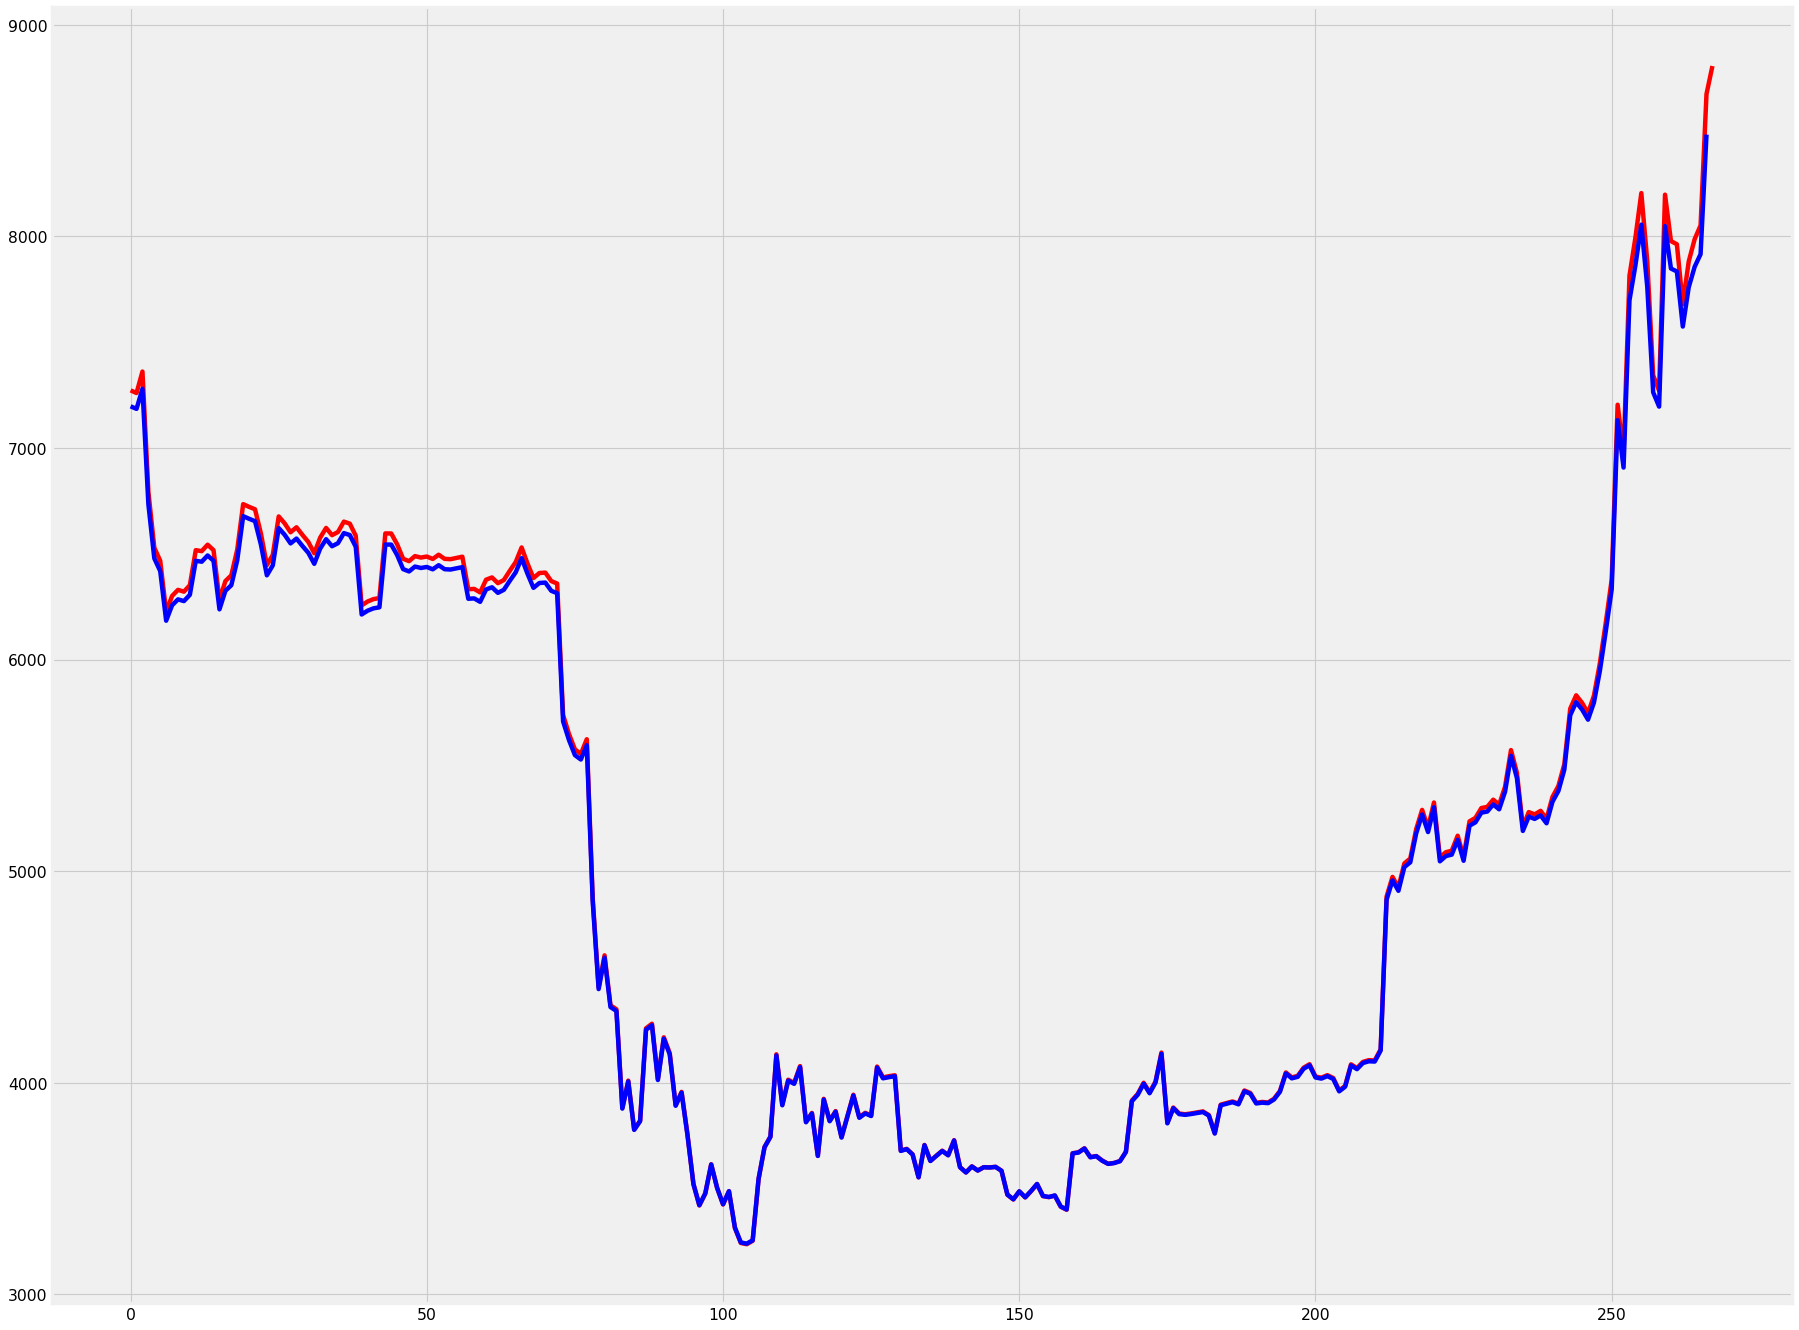

In [49]:
plt.figure(figsize = (25,20), dpi = 80, facecolor = 'w', edgecolor = 'k')
plt.plot(data_test.values, color = 'red', label = 'Real BTC Price')
plt.plot(predicted_price[:, 0], color = 'blue', label = "Predicted BTC Price")
plt.show()